## VGG 19 Model Implementation for Sign Language  detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/model_weights_vgg19_signLanguageDetection.h5

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.01G/1.03G [00:11<00:00, 93.4MB/s]
100% 1.03G/1.03G [00:11<00:00, 92.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/asl-alphabet.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16

# Warning
import warnings
warnings.filterwarnings("ignore")

# Main
import os
import glob
import cv2
import numpy as np
import pandas as pd
import gc
import string
import time
import random
from PIL import Image
from tqdm import tqdm
tqdm.pandas()

# Visualization
import matplotlib
import matplotlib.pyplot as plt




from sklearn.manifold import TSNE
# Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
train_dir = "/content/asl_alphabet_train/asl_alphabet_train"
test_dir = "/content/asl_alphabet_test/asl_alphabet_test"

In [7]:
import pathlib
data = pathlib.Path(train_dir)
data

PosixPath('/content/asl_alphabet_train/asl_alphabet_train')

In [8]:
image_count = len(list(data.glob('*/*.jpg')))
image_count

87000

In [9]:
A = list(data.glob('A/*'))[0:200]
len(A)

200

In [10]:
diction = {
    'A' : list(data.glob('A/*'))[:400],
    'B' : list(data.glob('B/*'))[:400],
    'C' : list(data.glob('C/*'))[:400],
    'D' : list(data.glob('D/*'))[:400],
    'E' : list(data.glob('E/*'))[:400]
    #'F' : list(data.glob('F/*'))[:500]
}
len(diction['A'])

400

In [11]:
labels_diction = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    #'F' : 5
}
labels_diction

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

In [12]:
for keyname,images in diction.items() :
  print(keyname)
  print(len(images))

A
400
B
400
C
400
D
400
E
400


In [13]:
x,y = [] , []
for keyname,images in diction.items() :
  for image in images : # we know that the term image is referring to a posixpath in diction dictionary
    img = cv2.imread(str(image)) # now we are using that path and converting them to numpy arrays using imread fundtion
    resized_img = cv2.resize(img,(224,224))
    x.append(resized_img) # we are storing resized perfect images in x list
    y.append(labels_diction[keyname]) # and we are adding its particular label in y list

In [14]:
# converting x,y lists into numpy arrays for further usage
x = np.array(x)
y = np.array(y)

In [15]:
x.shape

(2000, 224, 224, 3)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [17]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
#check from here if any error raises

In [18]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow import keras
from keras import datasets, layers, models

In [ ]:
# #The above output are the sizes of lists before augmentation
# #Now we will perform data augmentation to increase the no of samples and better training
# data_augmentation = keras.Sequential([
#    layers.experimental.preprocessing.RandomRotation(0.1),
#    layers.experimental.preprocessing.RandomContrast(0.1),
#    layers.experimental.preprocessing.RandomZoom(0.1),
# ])

In [21]:
# Initialising the model
model = models.Sequential()

#model.add(data_augmentation)
# Stage 1
model.add(layers.Conv2D(input_shape = (224, 224, 3), filters = 64, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 2
model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 3
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 4
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 5
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 6
model.add(layers.Flatten())
model.add(layers.Dense(units = 4096, activation='relu'))
model.add(layers.Dense(units = 4096, activation='relu'))
model.add(layers.Dense(units = 6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:

#model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=["accuracy"])



In [22]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

In [23]:
epochs = 120
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * drop**(1+epoch)/epochs_drop
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss='sparse_categorical_crossentropy', loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'],)

In [ ]:
#history = model.fit(x_train_scaled, y_train, epochs=40)

In [ ]:
# Fitting the training data into the model
history = model.fit(x_train_scaled, y_train,validation_data=(x_test,y_test),  epochs=epochs,callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.0012.
Epoch 1/120
47/47 [==============================] - 38s 782ms/step - loss: 1.7775 - accuracy: 0.1940 - val_loss: 1.7514 - val_accuracy: 0.1880 - lr: 0.0012

Epoch 2: LearningRateScheduler setting learning rate to 0.001152.
Epoch 2/120
47/47 [==============================] - 25s 523ms/step - loss: 1.7399 - accuracy: 0.2040 - val_loss: 1.6869 - val_accuracy: 0.1880 - lr: 0.0012

Epoch 3: LearningRateScheduler setting learning rate to 0.0011059199999999998.
Epoch 3/120
47/47 [==============================] - 25s 527ms/step - loss: 1.7026 - accuracy: 0.2040 - val_loss: 1.6772 - val_accuracy: 0.1880 - lr: 0.0011

Epoch 4: LearningRateScheduler setting learning rate to 0.0010616831999999997.
Epoch 4/120
47/47 [==============================] - 25s 540ms/step - loss: 1.6636 - accuracy: 0.1940 - val_loss: 1.8128 - val_accuracy: 0.1880 - lr: 0.0011

Epoch 5: LearningRateScheduler setting learning rate to 0.001019215872.
Epoch 5

In [ ]:
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

16/16 [==============================] - 2s 146ms/step - loss: 0.2201 - accuracy: 0.9540
Test accuracy: 0.9539999961853027
Test loss: 0.22008521854877472


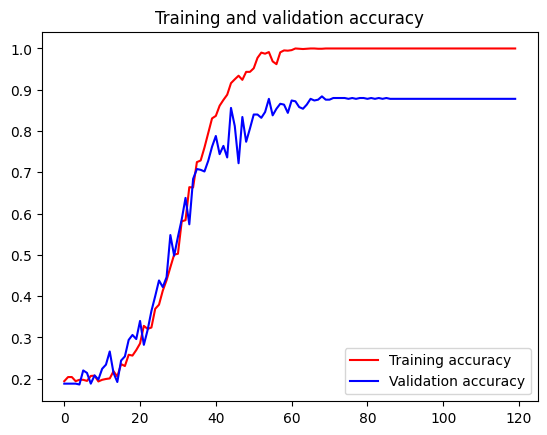

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
from google.colab import files
model.save_weights('model_weights_vgg19_signLanguageDetection.h5')


In [24]:
model.load_weights("/content/drive/MyDrive/model_weights_vgg19_signLanguageDetection.h5")
#for loading the weights

In [25]:
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(x_test_scaled), axis=1)
print(classification_report(y_test,predictions))

16/16 [==============================] - 17s 327ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       106
           1       0.97      0.96      0.97       103
           2       0.94      1.00      0.97        93
           3       0.98      0.94      0.96       104
           4       0.96      0.98      0.97        94

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



16/16 [==============================] - 2s 141ms/step


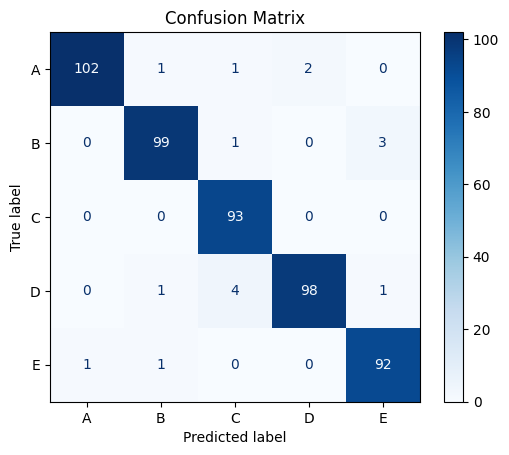

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert model predictions to class labels (integer values)
predictions = np.argmax(model.predict(x_test_scaled), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Define class labels for your specific case
class_labels = ["A","B","C","D","E"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

# prediction of values

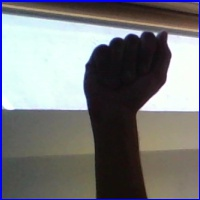

In [27]:
test = PIL.Image.open('/content/asl_alphabet_test/asl_alphabet_test/A_test.jpg')
test

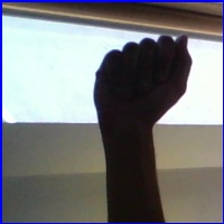

In [28]:
image_shape = (224,224)
test = PIL.Image.open('/content/asl_alphabet_test/asl_alphabet_test/A_test.jpg').resize(image_shape)
test

In [29]:
test = np.array(test)/255.0
test.shape

(224, 224, 3)

In [30]:
test = test[np.newaxis,...]

In [31]:
result=model.predict(test)
print(result)

1/1 [==============================] - 1s 640ms/step
[[1.0000000e+00 2.9114593e-20 1.3288552e-21 1.2012697e-32 1.0105269e-14
  0.0000000e+00]]


In [32]:
# Results           #CORRECT PREDICTION

if(np.argmax(result)==0):
  print('A')
elif(np.argmax(result)==1):
  print('B')
elif(np.argmax(result)==2):
  print('C')
elif(np.argmax(result)==3):
  print('D')
elif(np.argmax(result)==4):
  print('E')

A


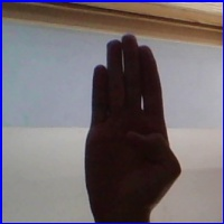

In [33]:
image_shape = (224,224)
test2 = PIL.Image.open('/content/asl_alphabet_test/asl_alphabet_test/B_test.jpg').resize(image_shape)
test2

In [34]:
test2 = np.array(test2)/255.0
test2.shape

(224, 224, 3)

In [35]:
test2 = test2[np.newaxis,...]

In [36]:
result2 = model.predict(test2)

1/1 [==============================] - 0s 29ms/step


In [37]:
if(np.argmax(result2)==0):
  print('A')
elif(np.argmax(result2)==1):
  print('B')
elif(np.argmax(result2)==2):
  print('C')
elif(np.argmax(result2)==3):
  print('D')                                  #CORRECT PREDICTION
elif(np.argmax(result2)==4):
  print('E')

B


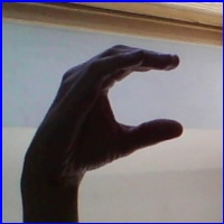

In [38]:
image_shape = (224,224)
test3 = PIL.Image.open('/content/asl_alphabet_test/asl_alphabet_test/C_test.jpg').resize(image_shape)
test3

In [39]:
test3 = np.array(test3)/255.0
test3.shape

(224, 224, 3)

In [40]:
test3 = test3[np.newaxis,...]

In [41]:
result3 = model.predict(test3)

1/1 [==============================] - 0s 21ms/step


In [42]:
if(np.argmax(result3)==0):
  print('A')
elif(np.argmax(result3)==1):
  print('B')
elif(np.argmax(result3)==2):
  print('C')                                  #CORRECT PREDICTION
elif(np.argmax(result3)==3):
  print('D')
elif(np.argmax(result3)==4):
  print('E')

C
